In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\khushi pawar\Downloads\placement.csv")

In [3]:
df.sample(5)

cgpa  placement_exam_marks  placed
131  8.19                  19.0       1
563  6.81                  14.0       1
596  8.48                  25.0       1
834  6.22                  52.0       1
477  5.78                  18.0       0

In [26]:
df.shape

(1000, 3)

C:\Users\khushi pawar\AppData\Local\Temp\ipykernel_5388\3743613196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],kde=True)
C:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cgpa', ylabel='Density'>

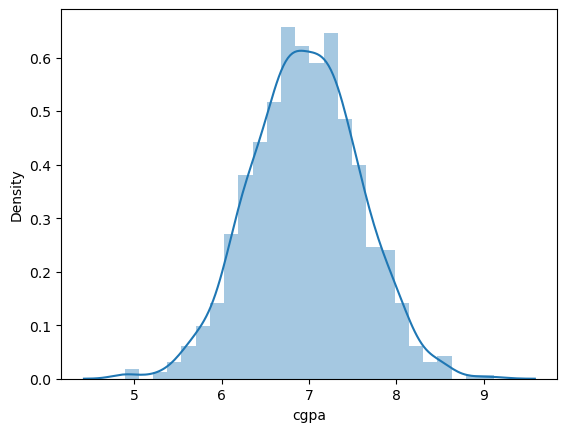

In [10]:
sns.distplot(df['cgpa'],kde=True)

C:\Users\khushi pawar\AppData\Local\Temp\ipykernel_5388\1007373467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],kde=True)
C:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

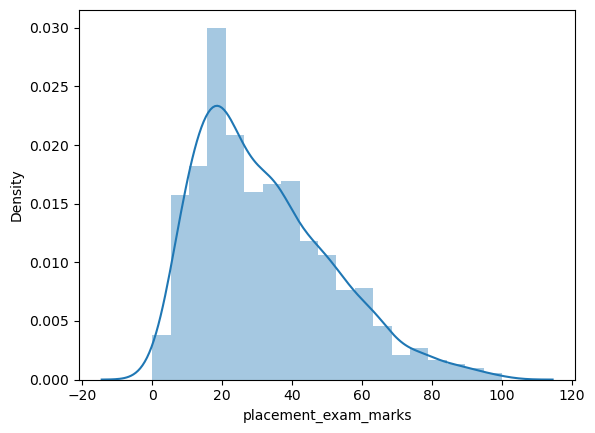

In [11]:
sns.distplot(df['placement_exam_marks'],kde=True)

In [12]:
print("mean",df['cgpa'].mean())
print("s.d",df['cgpa'].std())
print("min",df['cgpa'].min())
print("max",df['cgpa'].max())

mean 6.96124
s.d 0.6158978751323894
min 4.89
max 9.12


**Trimming**

In [17]:
print("highest",df['cgpa'].mean()+(3*df['cgpa'].std()))
print("lowest",df['cgpa'].mean()-(3*df['cgpa'].std()))

highest 8.808933625397168
lowest 5.113546374602832


In [28]:
high=df['cgpa'].mean()+(3*df['cgpa'].std())
low=df['cgpa'].mean()-(3*df['cgpa'].std())

In [29]:
df[ (df['cgpa']>high) | (df['cgpa']<low) ]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

In [32]:
new_df = df[ (df['cgpa']<8.80) & (df['cgpa']>5.11) ]

In [33]:
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

In [36]:
df['cgpa_z_score']= (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [37]:
df

cgpa  placement_exam_marks  placed  cgpa_z_score
0    7.19                  26.0       1      0.371425
1    7.46                  38.0       1      0.809810
2    7.54                  40.0       1      0.939701
3    6.42                   8.0       1     -0.878782
4    7.23                  17.0       0      0.436371
..    ...                   ...     ...           ...
995  8.87                  44.0       1      3.099150
996  9.12                  65.0       1      3.505062
997  4.89                  34.0       0     -3.362960
998  8.62                  46.0       1      2.693239
999  4.90                  10.0       1     -3.346724

[1000 rows x 4 columns]

In [44]:
lower= df[df['cgpa_z_score']<-3]
upper = df[df['cgpa_z_score']>3]

In [45]:
lower

cgpa  placement_exam_marks  placed  cgpa_z_score
485  4.92                  44.0       1     -3.314251
997  4.89                  34.0       0     -3.362960
999  4.90                  10.0       1     -3.346724

In [46]:
upper

cgpa  placement_exam_marks  placed  cgpa_z_score
995  8.87                  44.0       1      3.099150
996  9.12                  65.0       1      3.505062

In [49]:
new_df1 = df[(df['cgpa_z_score']>-3) & (df['cgpa_z_score']<3)]

In [50]:
new_df1

cgpa  placement_exam_marks  placed  cgpa_z_score
0    7.19                  26.0       1      0.371425
1    7.46                  38.0       1      0.809810
2    7.54                  40.0       1      0.939701
3    6.42                   8.0       1     -0.878782
4    7.23                  17.0       0      0.436371
..    ...                   ...     ...           ...
991  7.04                  57.0       0      0.127878
992  6.26                  12.0       0     -1.138565
993  6.73                  21.0       1     -0.375452
994  6.48                  63.0       0     -0.781363
998  8.62                  46.0       1      2.693239

[995 rows x 4 columns]

**capping**

In [51]:
lowest = df['cgpa'].mean()-3*df['cgpa'].std()
highest = df['cgpa'].mean()+3*df['cgpa'].std()

In [52]:
lowest

5.113546374602832

In [53]:
highest

8.808933625397168

In [54]:
df['cgpa']=np.where(
    df['cgpa']>highest,
    highest,
    np.where(
        df['cgpa']<lowest,
        lowest,
        df['cgpa']
    )
)

In [57]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64